In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import plotly.express as pex

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('/content/drive/MyDrive/Hackathon_Pythonicos/bd') ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Hackathon_Pythonicos/bd'

In [ ]:
from google.colab import drive
import pandas as pd

# Cargar el archivo
df = pd.read_csv('bd_sinColDummy.csv')
print(df.shape)
df.head()

(560, 10)


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,vector_camaras,vector_display,vector_network
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1]"


In [ ]:
import ast  # Add this import at the top

def expand_vector(modelo, col_base, prefix):
    """
    Convierte la columna con strings de listas en columnas binarias separadas.
    - col_base: nombre de la columna (ej. 'vector_camaras')
    - prefix  : prefijo para las nuevas columnas (ej. 'cam')
    """
    # 1) Garantizar lista: si el elemento ya es list, lo deja; si es string, lo evalúa
    def to_list(x):
        if isinstance(x, list):
            return x
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []          # si viene vacío o malformado

    modelo[col_base] = modelo[col_base].apply(to_list)

    # 2) Crear DataFrame con columnas expandidas
    ancho = len(modelo[col_base].iloc[0])           # asume mismo largo en todas las filas
    nuevas = pd.DataFrame(modelo[col_base].tolist(),
                          columns=[f'{prefix}_{i}' for i in range(ancho)],
                          index=modelo.index)  # Changed df.index to modelo.index

    # 3) Concatenar y eliminar la original
    resultado = pd.concat([modelo.drop(columns=[col_base]), nuevas], axis=1)  # Changed df to modelo
    return resultado

# Uso - usando la variable 'modelo' que ya existe
df_ex = expand_vector(df, 'vector_camaras',  'cam')
df_ex = expand_vector(df_ex, 'vector_display',  'disp')
df_ex = expand_vector(df_ex, 'vector_network',  'net')

print("Columnas totales:", df_ex.shape[1])
df_ex.head()

Columnas totales: 48


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
df = df_ex.copy()
df.head()

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
# Guardamos límites para futuro despliegue
quartiles, bin_edges = pd.qcut(df["price"], q=3, retbins=True, labels=False)
labels = ["low","mid","elite"]
df["categoria"] = quartiles.map(dict(enumerate(labels)))
df["categoria"] = df["categoria"].map({"low":0,"mid":1,"elite":2}).astype(int)


In [ ]:
df.head()

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4,categoria
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,1,1,1,0,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_cls = df.drop(columns=["price","categoria","name","ratings"])
y_cls = df["categoria"]

Xtr, Xts, ytr, yts = train_test_split(
        X_cls, y_cls, test_size=0.3, random_state=42, stratify=y_cls)

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6,
                             class_weight="balanced", random_state=42)

clf.fit(Xtr, ytr)
print(classification_report(yts, clf.predict(Xts), target_names=labels))

              precision    recall  f1-score   support

         low       0.79      0.82      0.81        56
         mid       0.85      0.39      0.54        56
       elite       0.63      0.95      0.76        56

    accuracy                           0.72       168
   macro avg       0.76      0.72      0.70       168
weighted avg       0.76      0.72      0.70       168



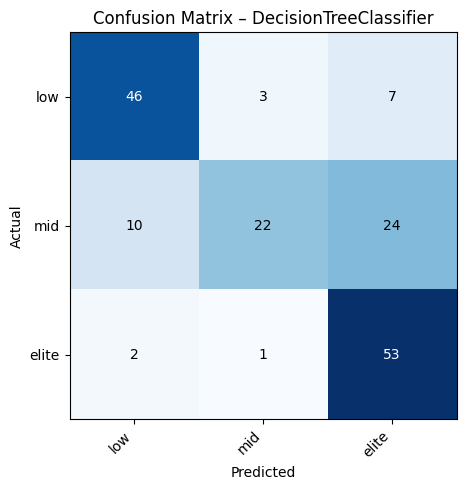

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# — Etiquetas de clase en el orden correcto
class_labels = ["low", "mid", "elite"]

# — Predicciones y matriz
y_pred = clf.predict(Xts)
cm      = confusion_matrix(yts, y_pred, labels=range(len(class_labels)))

# — Heatmap manual (sin seaborn)
fig, ax = plt.subplots(figsize=(6, 5))
im      = ax.imshow(cm, cmap="Blues")

# — Ejes y anotaciones
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45, ha="right")
ax.set_yticklabels(class_labels)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix – DecisionTreeClassifier")

# — Etiquetas dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()

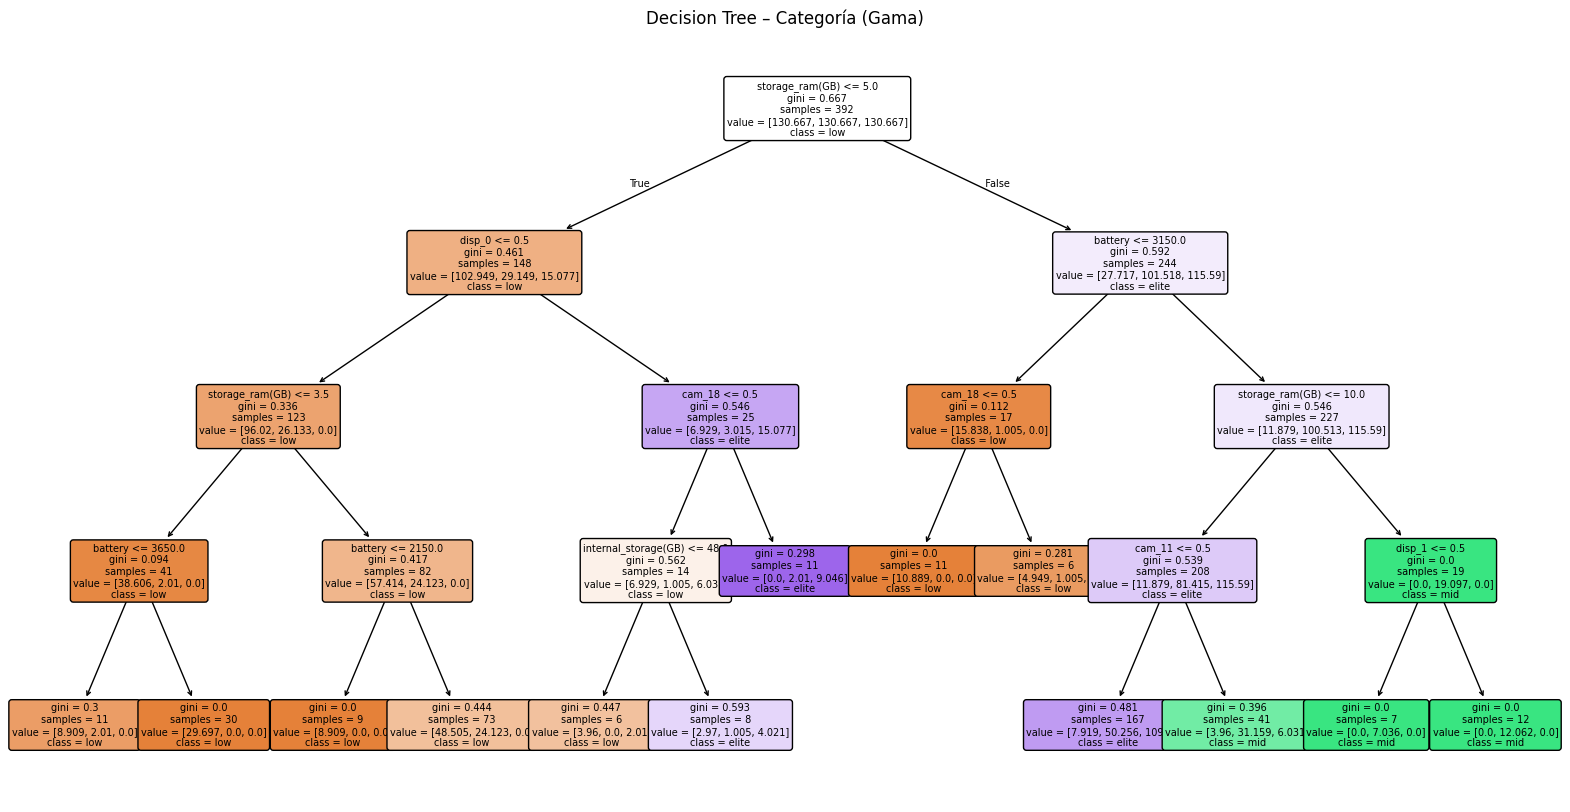

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X_cls.columns,       # mismo orden que usaste al entrenar
    class_names=class_labels,
    filled=True,
    rounded=True,
    fontsize=7
)
plt.title("Decision Tree – Categoría (Gama)")
plt.show()

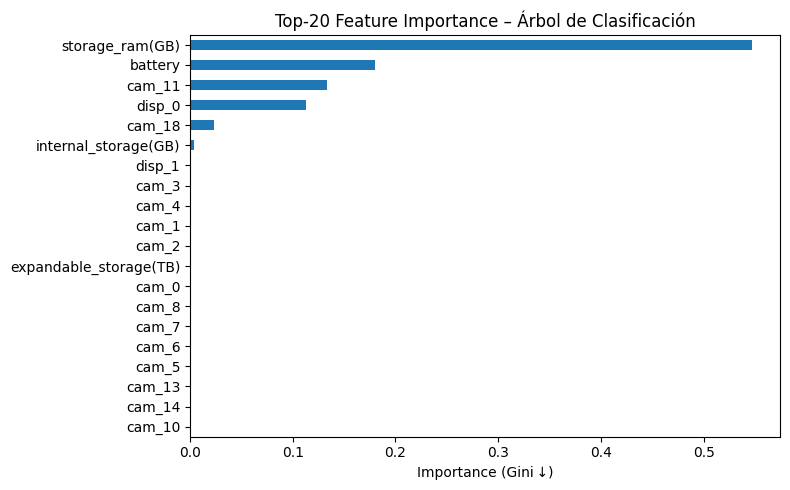

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    clf.feature_importances_,
    index=X_cls.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.head(20).plot(kind="barh")       # 20 más importantes
plt.gca().invert_yaxis()
plt.title("Top-20 Feature Importance – Árbol de Clasificación")
plt.xlabel("Importance (Gini ↓)")
plt.tight_layout()
plt.show()

In [ ]:
df["categoria_pred"] = clf.predict(X_cls)
df.head()

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4,categoria,categoria_pred
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,1,1,1,0,1,1,1


In [ ]:
df.dtypes

,0
name,object
ratings,float64
price,float64
internal_storage(GB),float64
storage_ram(GB),float64
expandable_storage(TB),float64
battery,float64
cam_0,int64
cam_1,int64
cam_2,int64


In [ ]:
# ------------------------------------------------------------------
# 1 · Imports
# ------------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score)
import joblib

RANDOM_STATE = 42

# ------------------------------------------------------------------
# 2 · Features & target
# ------------------------------------------------------------------
features_reg = df.drop(
        columns=["price", "name", "categoria", "ratings"]    # conserva 'categoria_pred'
)
y_reg = df["price"]

# ------------------------------------------------------------------
# 3 · Train / test split
# ------------------------------------------------------------------
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
        features_reg, y_reg,
        test_size=0.20,
        random_state=RANDOM_STATE
)

# ------------------------------------------------------------------
# 4 · Pre-procesado numérico
# ------------------------------------------------------------------
num_cols = Xr_train.select_dtypes(include="number").columns

prepro = ColumnTransformer(
        [("num", StandardScaler(), num_cols)],
        remainder="drop"
)

# ------------------------------------------------------------------
# 5 · Pipeline + búsqueda de hiperparámetros (DECISION TREE)
# ------------------------------------------------------------------
dtr  = DecisionTreeRegressor(random_state=RANDOM_STATE)

pipe = Pipeline([("prep", prepro),
                 ("model", dtr)])

param_grid = {
    "model__max_depth":         [None, 5, 10, 20],
    "model__min_samples_leaf":  [1, 2, 4, 8],
    "model__min_samples_split": [2, 5, 10]
}

cv = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
        scoring="neg_mean_absolute_error",
        n_jobs=-1
)

cv.fit(Xr_train, yr_train)

best_pipe = cv.best_estimator_          # árbol ya entrenado

# ------------------------------------------------------------------
# 6 · Evaluación en test
# ------------------------------------------------------------------
y_pred_reg = best_pipe.predict(Xr_test)

mae  = mean_absolute_error(yr_test, y_pred_reg)
mse  = mean_squared_error(yr_test, y_pred_reg)
rmse = np.sqrt(mse)
r2   = r2_score(yr_test, y_pred_reg)

print("Métricas de evaluación (test set):")
print(f"  MAE  (Error Medio Absoluto):      {mae:.2f}")
print(f"  RMSE (Raíz Error Cuadrático):     {rmse:.2f}")
print(f"  R²   (Coef. de determinación):    {r2:.4f}\n")

print("Mejor MAE en CV:  ", -cv.best_score_)
print("Mejores parámetros:", cv.best_params_)


Métricas de evaluación (test set):
  MAE  (Error Medio Absoluto):      39.07
  RMSE (Raíz Error Cuadrático):     79.17
  R²   (Coef. de determinación):    0.7749

Mejor MAE en CV:   46.97355491052851
Mejores parámetros: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


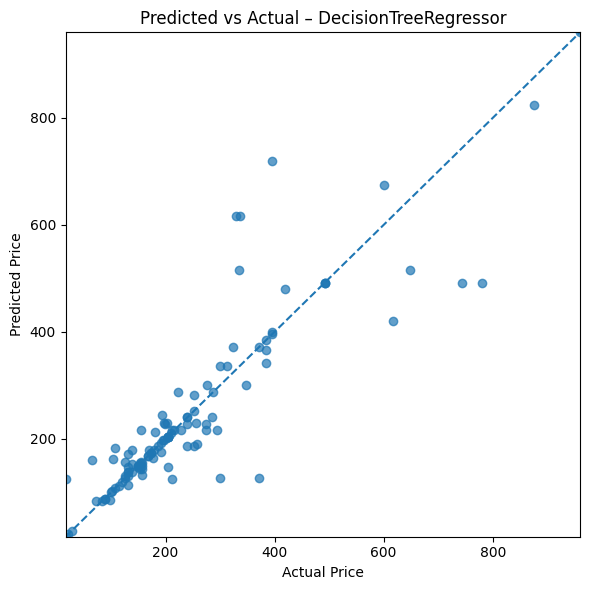

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_reg = best_pipe.predict(Xr_test)

plt.figure(figsize=(6, 6))
plt.scatter(yr_test, y_pred_reg, alpha=0.7)
lims = [min(yr_test.min(), y_pred_reg.min()),
        max(yr_test.max(), y_pred_reg.max())]
plt.plot(lims, lims, "--")                 # línea ideal
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual – DecisionTreeRegressor")
plt.tight_layout()
plt.show()

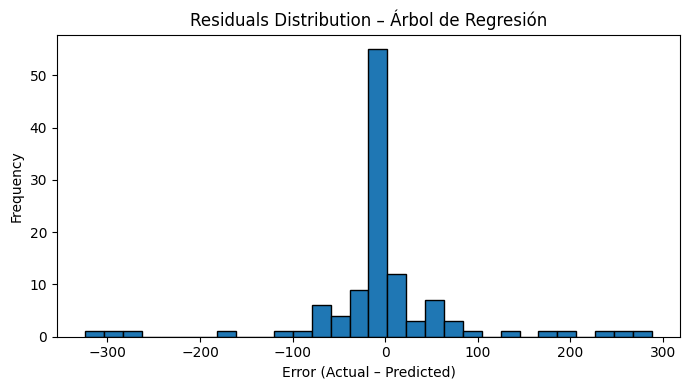

In [ ]:
residuals = yr_test - y_pred_reg

plt.figure(figsize=(7,4))
plt.hist(residuals, bins=30, edgecolor="k")
plt.title("Residuals Distribution – Árbol de Regresión")
plt.xlabel("Error (Actual – Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

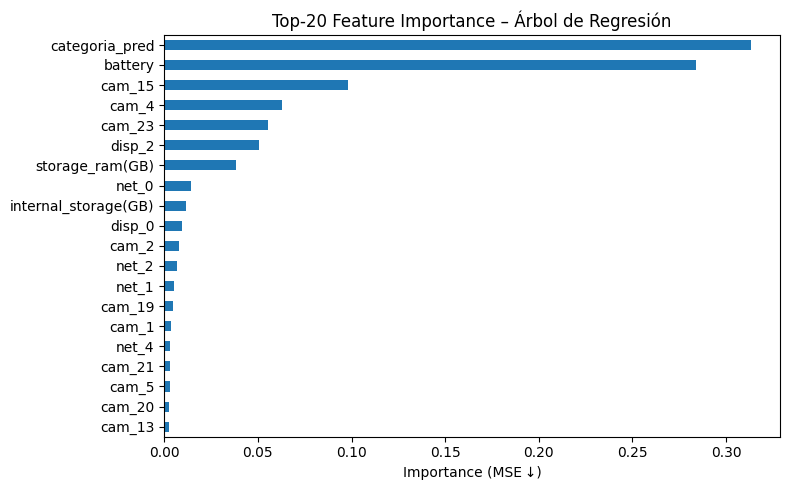

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

reg_tree = best_pipe.named_steps["model"]   # DecisionTreeRegressor entrenado

reg_importances = pd.Series(
    reg_tree.feature_importances_,
    index=num_cols     # solo numéricas (las que pasaron por el scaler)
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
reg_importances.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top-20 Feature Importance – Árbol de Regresión")
plt.xlabel("Importance (MSE ↓)")
plt.tight_layout()
plt.show()

In [ ]:
df_new = pd.read_csv("smartphone_clean.csv")

In [ ]:
import ast  # Add this import at the top

def expand_vector(modelo, col_base, prefix):
    """
    Convierte la columna con strings de listas en columnas binarias separadas.
    - col_base: nombre de la columna (ej. 'vector_camaras')
    - prefix  : prefijo para las nuevas columnas (ej. 'cam')
    """
    # 1) Garantizar lista: si el elemento ya es list, lo deja; si es string, lo evalúa
    def to_list(x):
        if isinstance(x, list):
            return x
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []          # si viene vacío o malformado

    modelo[col_base] = modelo[col_base].apply(to_list)

    # 2) Crear DataFrame con columnas expandidas
    ancho = len(modelo[col_base].iloc[0])           # asume mismo largo en todas las filas
    nuevas = pd.DataFrame(modelo[col_base].tolist(),
                          columns=[f'{prefix}_{i}' for i in range(ancho)],
                          index=modelo.index)  # Changed df.index to modelo.index

    # 3) Concatenar y eliminar la original
    resultado = pd.concat([modelo.drop(columns=[col_base]), nuevas], axis=1)  # Changed df to modelo
    return resultado

# Uso - usando la variable 'modelo' que ya existe
df_exp = expand_vector(df_new, 'vector_camaras',  'cam')
df_exp = expand_vector(df_exp, 'vector_display',  'disp')
df_exp = expand_vector(df_exp, 'vector_network',  'net')

print("Columnas totales:", df_exp.shape[1])
df_exp.head()

Columnas totales: 48


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,NaN,NaN,NaN,256,8,1.0,5000,0,1,0,...,0,0,0,0,0,1,1,1,0,1
1,NaN,NaN,NaN,64,8,0.0,6000,0,0,1,...,0,0,0,0,0,1,1,1,0,1
2,NaN,NaN,NaN,100,12,1.0,4400,0,1,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
df_new = df_exp.copy()
df_new.head()

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,NaN,NaN,NaN,256,8,1.0,5000,0,1,0,...,0,0,0,0,0,1,1,1,0,1
1,NaN,NaN,NaN,64,8,0.0,6000,0,0,1,...,0,0,0,0,0,1,1,1,0,1
2,NaN,NaN,NaN,100,12,1.0,4400,0,1,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
# --- gama 0-3 ---
df_new["categoria_pred"] = clf.predict(df_new.drop(columns=["name","price","ratings"])).astype(int)

# --- precio ---
df_new["predicted_price"] = best_pipe.predict(df_new.drop(columns=["name","price","ratings"]))

df_new

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4,categoria_pred,predicted_price
0,NaN,NaN,NaN,256,8,1.0,5000,0,1,0,...,0,0,0,1,1,1,0,1,2,491.99
1,NaN,NaN,NaN,64,8,0.0,6000,0,0,1,...,0,0,0,1,1,1,0,1,2,239.88
2,NaN,NaN,NaN,100,12,1.0,4400,0,1,0,...,0,0,0,1,1,1,0,1,1,185.99
